<div class="logo">
  <a href="https://colab.research.google.com/github/profpaulonascimento/gcet059/blob/main/gcet059_interpolacao_sistemas.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</div>

# <font color=green> INTRODUÇÃO

<font size=4>Muitas funções são conhecidas apenas em um conjunto discreto e finito de pontos de intervalo $[a,b]$ como, por exemplo, a tabela abaixo, que relaciona calor específico da água e temperatura.

<center>Tabela 01: Valores do calor específico da água entre 15°C e 60°C.</center>

<center>

|   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|
|**Temperatura (°C)** | 15 | 20| 25| 30| 35| 40| 45| 50| 55| 60|
|**Calor específico (J/(g·K))}** | 4.179| 4.181| 4.182| 4.184| 4.187| 4.192| 4.198| 4.205| 4.214| 4.216|

</center>

<font size=4>A partir desses dados, suponhamos que queiramos calcular o calor específico da água a $37{}^\circ C$ e a temperatura para qual o calor específico é $4.2$. Assim, a interpolação pode ajudar na resolução deste problema.

<font size=4>Interpolar consiste em aproximar uma função $f$ de determinada classe através de outra $g$ que não necessita estar nesta mesma classe (assim, podemos escolher uma que satisfaça determinadas propriedades que sejam ), sabendo que, em determinados pontos do domínio destas, as imagens são coincidentes. 

<font size=4>Consideremos o conjunto $X = \{x_{0}, x_{1}, x_{2}, \ldots, x_{n}\}$ com $n+1$ elementos e a função:
$$\begin{array}{rcl}
f : X & \to & \mathbb{R} \\
 x_{i} &\mapsto& f(x_{i}).
\end{array}$$
Devemos encontrar uma função $g(x)$, tal que
$$g(x_{k}) = f(x_{k}), k \in \{0, 1, \ldots, n\}.$$

<font size=4>Por exemplo, um truncamento da série de Taylor de uma função $f$ em torno do ponto $x=a$, $\displaystyle \sum_{n=0}^{\infty} \frac{(x-a)^n}{n!}f^{(n)}(a)$, é uma aproximação para a própria função $f$.

<font size=4>Utilizamos a interpolação, principalmente, quando:
* <font size=4>queremos determinar a imagem da função em um ponto cuja imagem não fora estabelecida, ou seja, não conhecemos a expressão analítica de $f(x)$ e, a partir dos pontos $(x_{0}; f(x_{0})$, $(x_{1}; f(x_{1})$, $\ldots$, $(x_{n}; f(x_{n})$, obtemos o polinômio. Esta situação ocorre frequentemente quando se trabalha com dados experimentais e necessitamos manipular $f(x)$.
* <font size=4>a função possui expressão extremamente complicada, de difícil ou impossível determinação. Visto isso, às vezes, se torna interessante sacrificar a precisão dos valores obtidos na imagem em prol do benefício da simplificação dos cálculos.

<font size=4>Devido à razoável facilidade com a qual os polinômios podem ter as suas raízes, derivadas e integrais calculadas por métodos computacionais, estudaremos aqui o método da **interpolação polinomial**. Portanto, existe uma vantagem considerável na substituição de uma função, de expressão altamente complicada, por um polinômio, considerando uma margem de erro pequena e aceitável.

<font size=4>Outros métodos são utilizados para uma aproximação por polinômio, dentre os quais podemos citar: o Método dos Quadrados Mínimos, a Osculação, o Mini-Max, etc.

<font size=4>A garantia da existência de um polinômio que aproxime uma determinada função é dada pelo Teorema de Weirstrass, que afirma que toda função contínua pode ser arbitrariamente aproximada por um polinômio.

A seguir, temos um código que nos ajuda a visualizar como estão distribuídos os pontos da tabela no plano.

[[15.    20.    25.    30.    35.    40.    45.    50.    55.    60.   ]
 [ 4.179  4.181  4.182  4.184  4.187  4.192  4.198  4.205  4.214  4.216]]


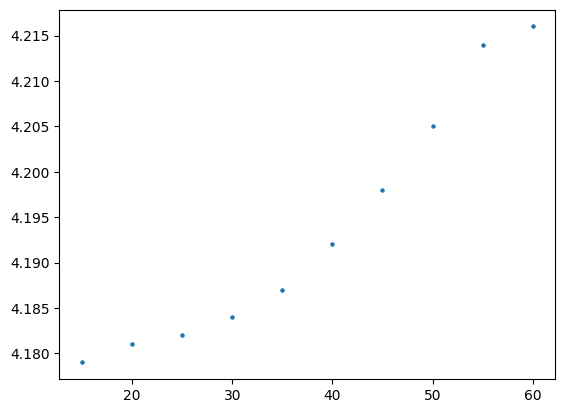

In [ ]:
import numpy as np
temperatura = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
calor = [4.179, 4.181, 4.182, 4.184, 4.187, 4.192, 4.198, 4.205, 4.214, 4.216]
m = len(temperatura)
pontos = np.zeros((m,2))
for i in range(len(temperatura)):
    pontos[i,0] = temperatura[i]
    pontos[i,1] = calor[i]
print(pontos.T)

import matplotlib.pyplot as plt

plt.scatter(temperatura,calor,s=5)
plt.show()

# <font color=green>INTERPOLAÇÃO POLINOMIAL

<font size=4>Neste tipo de interpolação, dados os $n+1$ pontos $(x_{i}; f(x_{i})), i = 0, 1, 2, \ldots, n$, devemos aproximar $f(x)$ por um polinômio $p_{n}(x)$ de grau no máximo igual a $n$ tal que
$$p_{n}(x_{i}) = f(x_{i}), \forall\ i \in \{0, 1, \ldots, n\}.$$
Tal polinômio é então chamado **polinômio interpolador** de uma função $y = f(x)$ sobre um conjunto de pontos distintos $(x_{i}; f(x_{i})), i = 0, 1 , \ldots, n$.

<font size=4>Como um polinômio de grau $n$ possui $n+1$ coeficientes, estes coeficientes são elementos do conjunto solução do sistema de equações
$$p_{n}(x_{i}) = f(x_{i}), i = 0, 1, \ldots, n,$$
ou seja,
$$\left\{\begin{array}{rcl}
a_{0} + a_{1}x_{0} + a_2x_{0}^2 + \ldots + a_{n}x_{0}^n & = & f(x_{0}) \\
a_{0} + a_{1}x_{1} + a_2x_{1}^2 + \ldots + a_{n}x_{1}^n & = & f(x_{1}) \\
a_{0} + a_{1}x_{2} + a_2x_{2}^2 + \ldots + a_{n}x_{2}^n & = & f(x_{2}) \\
 & \vdots & \\
a_{0} + a_{1}x_{n} + a_2x_{n}^2 + \ldots + a_{n}x_{n}^n & = & f(x_{n})
\end{array}\right.$$

<font size=4>O sistema acima possui solução única. De fato, a matriz dos coeficientes
$$X = \left[\begin{array}{ccccc}
1 & x_{0} & x_{0}^2 & \ldots & x_{0}^n \\
1 & x_{1} & x_{1}^2 & \ldots & x_{1}^n \\
1 & x_{2} & x_{2}^2 & \ldots & x_{2}^n \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n} & x_{n}^2 & \ldots & x_{n}^n
\end{array}\right]$$
é uma matriz de Vandermonde (matriz cujos termos de cada linha apresenta uma progressão geométrica) e seu determinante é obtido por
$$\det(X) = \displaystyle \prod_{j>i} (x_j-x_{i}).$$
Como $x_{i} \neq x_j, \forall\ i \neq j$, temos que $\det(X) \neq 0$ e, portanto, o sistema linear admite única solução. Assim, podemos enunciar o seguinte teorema:

<font size=4>**Teorema**:
Existe um único polinômio $p_{n}(x)$, de grau menor ou igual a $n$, tal que:
$$p_{n}(x_{i}) = f(x_{i}), i = 0, 1, \ldots, n, x_{i} \neq x_j, i \neq j.$$

## Exemplo:

<font size=4>Encontre um polinômio que interpola os pontos da tabela
$$\begin{array}{c|c|c|c}
x & -1 & 0 & 2 \\ \hline
f(x) & 4 & 1 & -1
\end{array}$$

## Solução:

<font size=4>Inicialmente, iremos colocar os dados da tabela como vetores, utilizando o `numpy array`.

In [ ]:
import numpy as np
x1 = np.array([-1,0,2])
y1 = np.array([4,1,-1])
n = len(x1)
x1.shape

(3,)

<font size=4>Para montarmos a matriz $X$, devemos observar que os elementos de cada coluna $j$, $j=0,1,2$, é dada por $(x[i])^j, i = 0,1,2$. 

In [ ]:
x0 = pow(x1,0)
x0

array([1, 1, 1])

In [ ]:
x2 = pow(x1,2)
x2

array([1, 0, 4])

<font size=4>Contruímos a matriz $X$ de ordem $n$, qeu possui, inicialmente, elementos iguais a zero.

In [ ]:
X = np.zeros((n,n))
X

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

<font size=4>Atribuímos à cada coluna de $X$, o respectivo vetor coluna $xi$, $i=0,1,2$.

In [ ]:
X[:,0]=x0
X[:,1]=x1
X[:,2]=x2
X

array([[ 1., -1.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  2.,  4.]])

<font size=4>Para encontrar os coeficientes $a_0, a_1, a_2$ do polinômio $p_2(x) = a_0+a_1x+a_2x^2$, multiplicaremos $X^{-1}$ por $y1$, nesta ordem.

In [ ]:
a = np.linalg.inv(X)@y1

1.0

<font size=4>O polinomio é então dado por:

In [ ]:
import sympy as sp
t = sp.symbols('t')

p2 = lambda t: a[0]+a[1]*t+a[2]*t**2
p2(t)

0.666666666666667*t**2 - 2.33333333333333*t + 1.0

<font size=4>A seguir, o gráfico dos pontos da tabela e do polinômio interpolador.

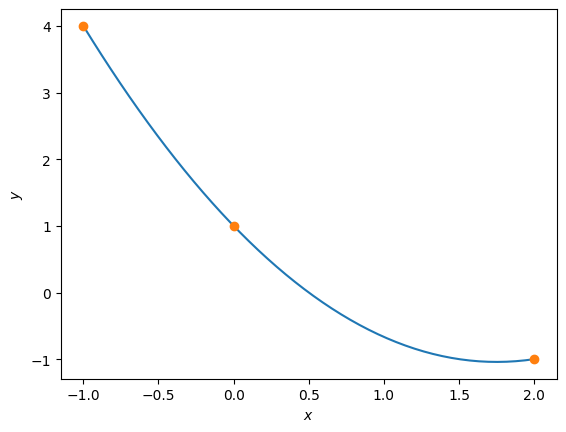

In [ ]:
import matplotlib.pyplot as plt
s = np.linspace(-1,2,50)
plt.plot(s,p2(s))
plt.plot(x1,y1,'o')
plt.xlabel('$x$');plt.ylabel('$y$')
plt.show()

# EXERCÍCIOS

## Questão 01

<font size=4>Dada a função $f(x) = 3x^4-2x+5$, com os valores de $f(1)$ e $f(2)$ determinar $p_{1}(1.5)$ e o erro absoluto ao determiná-lo.

## Questão 02

<font size=4>Calcule o calor específico aproximado da água a $32{}^\circ C$, usando os valores da Tabela 01 e um polinômio interpolador de grau um.

## Questão 03

<font size=4>Utilizando os valores $\dfrac{\pi}{10}$, $\dfrac{2\pi}{5}$ e $\dfrac{4\pi}{5}$, determine a função quadrática que interpola $f(x) = \sin^2(x) (x+1)^{-1}$, trabalhando com 8 casas decimais.

## Questão 04

<font size=4>Determine o valor de $f(0.8)$ e o erro absoluto ocasionado pela aplicação da interpolação quadrática, no cálculo deste valor, usando os valores da função $f(x) = x^2-5x+6$ avaliados em $0.6$, $0.9$ e $1.1$. Utilizar 5 casas decimais.